# Pandas

Pandas is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.

Library documentation: <a>http://pandas.pydata.org/</a>

### General

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# create a series
s = pd.Series([1,3,5,np.nan,6,8])
s

0     1
1     3
2     5
3   NaN
4     6
5     8
dtype: float64

In [3]:
# create a data frame
dates = pd.date_range('20130101',periods=6)
df = pd.DataFrame(np.random.randn(6,4),index=dates,columns=list('ABCD'))
df

,A,B,C,D
2013-01-01,0.205240,0.527603,0.610052,0.469292
2013-01-02,0.818113,-0.894390,-1.602831,0.862170
2013-01-03,-1.462109,0.483201,-1.044973,-0.534227
2013-01-04,0.719197,-0.499809,1.145788,-0.809526
2013-01-05,-1.161051,-0.115774,-0.624413,0.474422
2013-01-06,0.000782,0.146544,0.033628,-0.419772


In [4]:
# another way to create a data frame
df2 = pd.DataFrame(
    { 'A' : 1.,
      'B' : pd.Timestamp('20130102'),
      'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
      'D' : np.array([3] * 4,dtype='int32'),
      'E' : 'foo' })
df2

,A,B,C,D,E
0,1,2013-01-02,1,3,foo
1,1,2013-01-02,1,3,foo
2,1,2013-01-02,1,3,foo
3,1,2013-01-02,1,3,foo


In [5]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E            object
dtype: object

In [6]:
df.head()

,A,B,C,D
2013-01-01,0.205240,0.527603,0.610052,0.469292
2013-01-02,0.818113,-0.894390,-1.602831,0.862170
2013-01-03,-1.462109,0.483201,-1.044973,-0.534227
2013-01-04,0.719197,-0.499809,1.145788,-0.809526
2013-01-05,-1.161051,-0.115774,-0.624413,0.474422


In [7]:
df.index

<class 'pandas.tseries.index.DatetimeIndex'>
[2013-01-01, ..., 2013-01-06]
Length: 6, Freq: D, Timezone: None

In [8]:
df.columns

Index([u'A', u'B', u'C', u'D'], dtype='object')

In [9]:
df.values

array([[  2.05240362e-01,   5.27602841e-01,   6.10052272e-01,
          4.69292270e-01],
       [  8.18112883e-01,  -8.94389618e-01,  -1.60283098e+00,
          8.62169894e-01],
       [ -1.46210940e+00,   4.83201108e-01,  -1.04497297e+00,
         -5.34226832e-01],
       [  7.19196807e-01,  -4.99809344e-01,   1.14578824e+00,
         -8.09525609e-01],
       [ -1.16105080e+00,  -1.15774007e-01,  -6.24412514e-01,
          4.74421893e-01],
       [  7.82298420e-04,   1.46543576e-01,   3.36282758e-02,
         -4.19771560e-01]])

In [10]:
# quick data summary
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.146638,-0.058771,-0.247125,0.007060
std,0.957650,0.561381,1.036400,0.679012
min,-1.462109,-0.894390,-1.602831,-0.809526
25%,-0.870593,-0.403801,-0.939833,-0.505613
50%,0.103011,0.015385,-0.295392,0.024760
75%,0.590708,0.399037,0.465946,0.473139
max,0.818113,0.527603,1.145788,0.862170


In [11]:
df.T

,2013-01-01 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00,2013-01-06 00:00:00
A,0.205240,0.818113,-1.462109,0.719197,-1.161051,0.000782
B,0.527603,-0.894390,0.483201,-0.499809,-0.115774,0.146544
C,0.610052,-1.602831,-1.044973,1.145788,-0.624413,0.033628
D,0.469292,0.862170,-0.534227,-0.809526,0.474422,-0.419772


In [12]:
# axis 0 is index, axis 1 is columns
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,0.469292,0.610052,0.527603,0.205240
2013-01-02,0.862170,-1.602831,-0.894390,0.818113
2013-01-03,-0.534227,-1.044973,0.483201,-1.462109
2013-01-04,-0.809526,1.145788,-0.499809,0.719197
2013-01-05,0.474422,-0.624413,-0.115774,-1.161051
2013-01-06,-0.419772,0.033628,0.146544,0.000782


In [13]:
# can sort by values too
df.sort(columns='B')

,A,B,C,D
2013-01-02,0.818113,-0.894390,-1.602831,0.862170
2013-01-04,0.719197,-0.499809,1.145788,-0.809526
2013-01-05,-1.161051,-0.115774,-0.624413,0.474422
2013-01-06,0.000782,0.146544,0.033628,-0.419772
2013-01-03,-1.462109,0.483201,-1.044973,-0.534227
2013-01-01,0.205240,0.527603,0.610052,0.469292


### Selection

In [14]:
# select a column (yields a series)
df['A']

2013-01-01    0.205240
2013-01-02    0.818113
2013-01-03   -1.462109
2013-01-04    0.719197
2013-01-05   -1.161051
2013-01-06    0.000782
Freq: D, Name: A, dtype: float64

In [15]:
# column names also attached to the object
df.A

2013-01-01    0.205240
2013-01-02    0.818113
2013-01-03   -1.462109
2013-01-04    0.719197
2013-01-05   -1.161051
2013-01-06    0.000782
Freq: D, Name: A, dtype: float64

In [16]:
# slicing works
df[0:3]

,A,B,C,D
2013-01-01,0.205240,0.527603,0.610052,0.469292
2013-01-02,0.818113,-0.894390,-1.602831,0.862170
2013-01-03,-1.462109,0.483201,-1.044973,-0.534227


In [17]:
df['20130102':'20130104']

,A,B,C,D
2013-01-02,0.818113,-0.894390,-1.602831,0.862170
2013-01-03,-1.462109,0.483201,-1.044973,-0.534227
2013-01-04,0.719197,-0.499809,1.145788,-0.809526


In [18]:
# cross-section using a label
df.loc[dates[0]]

A    0.205240
B    0.527603
C    0.610052
D    0.469292
Name: 2013-01-01 00:00:00, dtype: float64

In [19]:
# getting a scalar value
df.loc[dates[0], 'A']

0.20524036189008577

In [20]:
# select via position
df.iloc[3]

A    0.719197
B   -0.499809
C    1.145788
D   -0.809526
Name: 2013-01-04 00:00:00, dtype: float64

In [21]:
df.iloc[3:5,0:2]

,A,B
2013-01-04,0.719197,-0.499809
2013-01-05,-1.161051,-0.115774


In [22]:
# column slicing
df.iloc[:,1:3]

,B,C
2013-01-01,0.527603,0.610052
2013-01-02,-0.894390,-1.602831
2013-01-03,0.483201,-1.044973
2013-01-04,-0.499809,1.145788
2013-01-05,-0.115774,-0.624413
2013-01-06,0.146544,0.033628


In [23]:
# get a value by index
df.iloc[1,1]

-0.89438961765370562

In [24]:
# boolean indexing
df[df.A > 0]

,A,B,C,D
2013-01-01,0.205240,0.527603,0.610052,0.469292
2013-01-02,0.818113,-0.894390,-1.602831,0.862170
2013-01-04,0.719197,-0.499809,1.145788,-0.809526
2013-01-06,0.000782,0.146544,0.033628,-0.419772


In [25]:
df[df > 0]

,A,B,C,D
2013-01-01,0.205240,0.527603,0.610052,0.469292
2013-01-02,0.818113,NaN,NaN,0.862170
2013-01-03,NaN,0.483201,NaN,NaN
2013-01-04,0.719197,NaN,1.145788,NaN
2013-01-05,NaN,NaN,NaN,0.474422
2013-01-06,0.000782,0.146544,0.033628,NaN


In [26]:
# filtering
df3 = df.copy()
df3['E'] = ['one', 'one', 'two', 'three', 'four', 'three']
df3[df3['E'].isin(['two', 'four'])]

,A,B,C,D,E
2013-01-03,-1.462109,0.483201,-1.044973,-0.534227,two
2013-01-05,-1.161051,-0.115774,-0.624413,0.474422,four


In [27]:
# setting examples
df.at[dates[0],'A'] = 0
df.iat[0,1] = 0
df.loc[:, 'D'] = np.array([5] * len(df))
df

,A,B,C,D
2013-01-01,0.000000,0.000000,0.610052,5
2013-01-02,0.818113,-0.894390,-1.602831,5
2013-01-03,-1.462109,0.483201,-1.044973,5
2013-01-04,0.719197,-0.499809,1.145788,5
2013-01-05,-1.161051,-0.115774,-0.624413,5
2013-01-06,0.000782,0.146544,0.033628,5


In [28]:
# dealing with missing data
df4 = df.reindex(index=dates[0:4],columns=list(df.columns) + ['E'])
df4.loc[dates[0]:dates[1],'E'] = 1
df4

,A,B,C,D,E
2013-01-01,0.000000,0.000000,0.610052,5,1
2013-01-02,0.818113,-0.894390,-1.602831,5,1
2013-01-03,-1.462109,0.483201,-1.044973,5,NaN
2013-01-04,0.719197,-0.499809,1.145788,5,NaN


In [29]:
# drop rows with missing data
df4.dropna(how='any')

,A,B,C,D,E
2013-01-01,0.000000,0.00000,0.610052,5,1
2013-01-02,0.818113,-0.89439,-1.602831,5,1


In [30]:
# fill missing data
df4.fillna(value=5)

,A,B,C,D,E
2013-01-01,0.000000,0.000000,0.610052,5,1
2013-01-02,0.818113,-0.894390,-1.602831,5,1
2013-01-03,-1.462109,0.483201,-1.044973,5,5
2013-01-04,0.719197,-0.499809,1.145788,5,5


In [31]:
# boolean mask for nan values
pd.isnull(df4)

,A,B,C,D,E
2013-01-01,False,False,False,False,False
2013-01-02,False,False,False,False,False
2013-01-03,False,False,False,False,True
2013-01-04,False,False,False,False,True


### Operations

In [32]:
df.mean()

A   -0.180845
B   -0.146705
C   -0.247125
D    5.000000
dtype: float64

In [33]:
# pivot the mean calculation
df.mean(1)

2013-01-01    1.402513
2013-01-02    0.830223
2013-01-03    0.744030
2013-01-04    1.591294
2013-01-05    0.774691
2013-01-06    1.295239
Freq: D, dtype: float64

In [34]:
# aligning objects with different dimensions
s = pd.Series([1,3,5,np.nan,6,8],index=dates).shift(2)
df.sub(s,axis='index')

,A,B,C,D
2013-01-01,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN
2013-01-03,-2.462109,-0.516799,-2.044973,4
2013-01-04,-2.280803,-3.499809,-1.854212,2
2013-01-05,-6.161051,-5.115774,-5.624413,0
2013-01-06,NaN,NaN,NaN,NaN


In [35]:
# applying functions
df.apply(np.cumsum)

,A,B,C,D
2013-01-01,0.000000,0.000000,0.610052,5
2013-01-02,0.818113,-0.894390,-0.992779,10
2013-01-03,-0.643997,-0.411189,-2.037752,15
2013-01-04,0.075200,-0.910998,-0.891963,20
2013-01-05,-1.085851,-1.026772,-1.516376,25
2013-01-06,-1.085068,-0.880228,-1.482748,30


In [36]:
df.apply(lambda x: x.max() - x.min())

A    2.280222
B    1.377591
C    2.748619
D    0.000000
dtype: float64

In [37]:
# simple count aggregation
s = pd.Series(np.random.randint(0,7,size=10))
s.value_counts()

4    3
6    2
1    2
0    2
5    1
dtype: int64

### Merging / Grouping / Shaping

In [38]:
# concatenation
df = pd.DataFrame(np.random.randn(10, 4))
pieces = [df[:3], df[3:7], df[7:]]
pd.concat(pieces)

,0,1,2,3
0,-0.006589,-1.232048,-0.147323,0.709050
1,-1.201048,0.675688,1.110037,0.553489
2,-0.159224,-1.226735,-0.141689,-1.450920
3,-0.049450,-0.438565,0.670832,1.089032
4,-0.105969,-0.891644,0.626482,0.416679
5,-1.103222,-1.983806,0.282366,0.031730
6,0.380308,-0.397791,-0.322955,0.074480
7,-0.623134,-0.205967,-0.367622,1.437279
8,-0.481202,1.242607,-2.107715,1.020051
9,-0.345859,-0.759047,-0.927940,1.487916


In [39]:
# SQL-style join
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


In [40]:
# append
df = pd.DataFrame(np.random.randn(8, 4), columns=['A', 'B', 'C', 'D'])
s = df.iloc[3]
df.append(s, ignore_index=True)

,A,B,C,D
0,-0.992219,1.298979,0.998799,-0.164381
1,0.902147,1.118289,-0.169358,0.117833
2,1.201061,-1.699020,-2.112810,-1.412482
3,1.084910,1.171135,0.384876,0.535239
4,-0.922543,-0.018670,-1.506012,0.293739
5,0.481017,0.639182,-0.090676,0.951261
6,1.201241,2.528836,-0.530795,0.901950
7,0.899290,0.562738,1.566468,-0.846827
8,1.084910,1.171135,0.384876,0.535239


In [41]:
df = pd.DataFrame(
    { 'A' : ['foo', 'bar', 'foo', 'bar', 'foo', 'bar', 'foo', 'foo'],
      'B' : ['one', 'one', 'two', 'three', 'two', 'two', 'one', 'three'],
      'C' : np.random.randn(8),
      'D' : np.random.randn(8) })
df

,A,B,C,D
0,foo,one,0.193948,-1.385614
1,bar,one,-0.257859,2.127808
2,foo,two,-0.944848,-0.760487
3,bar,three,-0.872161,-1.707254
4,foo,two,-0.658552,0.175699
5,bar,two,-1.887614,0.627801
6,foo,one,0.439001,-2.264125
7,foo,three,-0.829368,-1.229315


In [42]:
# group by
df.groupby('A').sum()

,C,D
A,,
bar,-3.017634,1.048355
foo,-1.799818,-5.463842


In [43]:
# group by multiple columns
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one   -0.257859  2.127808
    three -0.872161 -1.707254
    two   -1.887614  0.627801
foo one    0.632949 -3.649739
    three -0.829368 -1.229315
    two   -1.603400 -0.584788

In [44]:
df = pd.DataFrame(
    { 'A' : ['one', 'one', 'two', 'three'] * 3,
      'B' : ['A', 'B', 'C'] * 4,
      'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
      'D' : np.random.randn(12),
      'E' : np.random.randn(12)} )
df

,A,B,C,D,E
0,one,A,foo,-0.853288,2.549878
1,one,B,foo,0.552557,0.865465
2,two,C,foo,0.700943,0.800563
3,three,A,bar,-0.466072,0.011508
4,one,B,bar,0.465724,1.087874
5,one,C,bar,1.105949,-0.118134
6,two,A,foo,-0.666630,-0.143474
7,three,B,foo,0.644902,1.731818
8,one,C,foo,0.819170,-1.153036
9,one,A,bar,-1.849893,0.733137


In [45]:
# pivot table
pd.pivot_table(df, values='D', rows=['A', 'B'], columns=['C'])

C:\Program Files\Anaconda\lib\site-packages\pandas\util\decorators.py:53: FutureWarning: rows is deprecated, use index instead
  warnings.warn(msg, FutureWarning)


C             bar       foo
A     B                    
one   A -1.849893 -0.853288
      B  0.465724  0.552557
      C  1.105949  0.819170
three A -0.466072       NaN
      B       NaN  0.644902
      C  0.592939       NaN
two   A       NaN -0.666630
      B  0.684170       NaN
      C       NaN  0.700943

### Time Series

In [46]:
# time period resampling
rng = pd.date_range('1/1/2012', periods=100, freq='S')
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts.resample('5Min', how='sum')

2012-01-01    24406
Freq: 5T, dtype: int32

In [47]:
rng = pd.date_range('1/1/2012', periods=5, freq='M')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-01-31   -0.624893
2012-02-29   -0.176292
2012-03-31    1.673556
2012-04-30    0.707903
2012-05-31    0.533647
Freq: M, dtype: float64

In [48]:
ps = ts.to_period()
ps.to_timestamp()

2012-01-01   -0.624893
2012-02-01   -0.176292
2012-03-01    1.673556
2012-04-01    0.707903
2012-05-01    0.533647
Freq: MS, dtype: float64

### Plotting

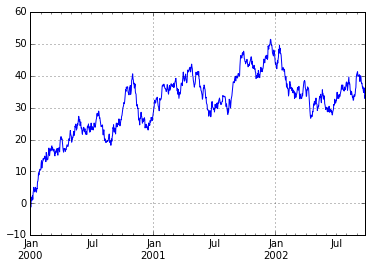

In [49]:
# time series plot
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()

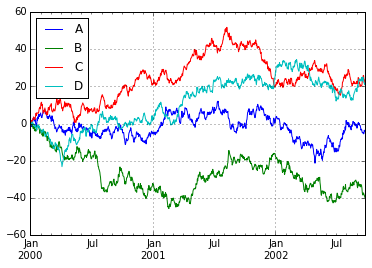

In [50]:
# plot with a data frame
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
plt.figure(); df.plot(); plt.legend(loc='best')

### Input / Output

In [51]:
# write to a csv file
df.to_csv('foo.csv', index=False)

In [52]:
# read file back in
path = r'C:\Users\John\Documents\IPython Notebooks\foo.csv'
newDf = pd.read_csv(path)
newDf.head()

,A,B,C,D
0,-0.914956,0.294759,0.143332,0.174706
1,-0.297442,1.640208,0.425301,-0.075666
2,-0.762292,0.741179,0.505002,-0.128560
3,-1.577471,-0.495294,1.803332,0.188178
4,-0.137486,-0.676985,1.435308,0.181047


In [53]:
# remove the file
import os
os.remove(path)

In [54]:
# can also do Excel
df.to_excel('foo.xlsx', sheet_name='Sheet1')

In [55]:
newDf2 = pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])
newDf2.head()

,A,B,C,D
2000-01-01,-0.914956,0.294759,0.143332,0.174706
2000-01-02,-0.297442,1.640208,0.425301,-0.075666
2000-01-03,-0.762292,0.741179,0.505002,-0.128560
2000-01-04,-1.577471,-0.495294,1.803332,0.188178
2000-01-05,-0.137486,-0.676985,1.435308,0.181047


In [56]:
os.remove('foo.xlsx')